# 안녕하세요^^ 
# AIVLE 2차 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.

* "1. 데이터 불러오기 및 분석" 단계에서는 제공되는 데이터를 불러와 feature들을 확인 해보는 작업을 진행 합니다.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
%pip install pandas seaborn

---

## 기본 데이터 

* 21년도 데이터 train 데이터
* 22년도 데이터 test 데이터

[미세먼지 데이터]
* 21년도 미세먼지 데이터 : air_2021.csv
* 22년도 미세먼지 데이터 : air_2022.csv

[날씨 데이터]
* 21년도 날씨 데이터 : weather_2021.csv
* 22년도 날씨 데이터 : weather_2022.csv

---

# 1. 데이터 불러오기
## 서울시 미세먼지 데이터와 기상 데이터를 불러오도록 하겠습니다.

#### [실습문제1] 미세먼지 데이터 로딩
* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 아래에 'Pandas'를 Import하고 두 개의 파일을 불러오고 Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 구분자(sep) : ','
* encoder = 'UTF-8'
* index_col = 0

In [1]:
# 필요한 라이브러리를 불러오세요.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21 = pd.read_csv('air_2021.csv', delimiter=',', encoding='UTF8', index_col = 0)

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22 = pd.read_csv('air_2022.csv', delimiter=',', encoding='UTF8', index_col = 0)

In [5]:
# 데이터 프레임의 Shape을 확인합니다.
air_21.shape

(8760, 12)

In [6]:
# 데이터 프레임의 Shape을 확인합니다.
air_22.shape

(2160, 12)

#### [실습문제2] 날씨 데이터 로딩
* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 아래에 'Pandas'를 Import하고 두 개의 파일을 불러오고 Shape을 확인하는 소스코드를 작성하고 실행해보세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_21 = pd.read_csv('weather_2021.csv', delimiter=',', encoding = 'cp949')
weather_22 = pd.read_csv('weather_2022.csv', delimiter=',', encoding = 'cp949')

In [8]:
# 데이터 프레임의 Shape을 확인합니다.
weather_21.shape

(8759, 38)

In [9]:
weather_22.shape

(2160, 38)

---

# 2. 다양한 변수 확인

#### [실습문제3] 미세먼지 데이터와 날씨 데이터의 다양한 변수를 확인해 보도록 하겠습니다

* 미세먼지 데이터 : https://www.airkorea.or.kr/web/last_amb_hour_data?pMENU_NO=123


* 날씨 데이터 : https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

* 도메인 지식 습득과 함께 변수에 대한 정보를 직접 파악해 보세요.

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

---

# 3. 데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

In [12]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [52]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


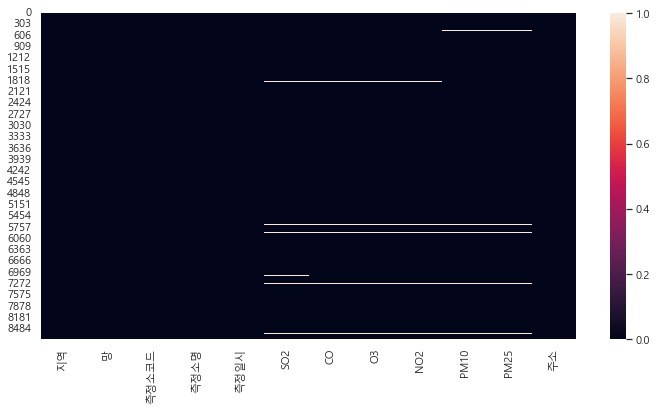

In [82]:
plt.figure(figsize = (12,6))
sns.heatmap(air_21.isna())
plt.show()

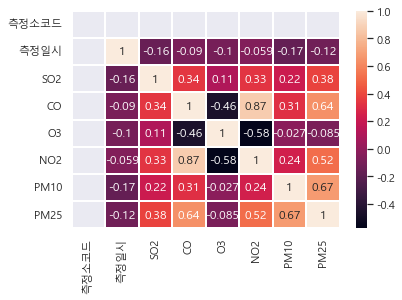

In [89]:
sns.heatmap(air_21.corr(), annot = True, linewidth = .2)
plt.show()

#### [실습문제4] 미세먼지 데이터 알아보기
* air_21,air_22 의 다양한 변수에 대하여 여러 그래프를 그려보고 인사이트를 도출해보세요.

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소'],
      dtype='object')

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_21['지역'].value_counts()

서울 종로구    8760
Name: 지역, dtype: int64

In [18]:
air_21['주소'].value_counts()

서울 종로구 종로35가길 19    8760
Name: 주소, dtype: int64

### '망'

In [23]:
feature = '망'
print(air_21[feature].isnull().sum())

0


In [25]:
air_21[feature].value_counts()

도시대기    8760
Name: 망, dtype: int64

In [24]:
air_21[feature].describe()

count     8760
unique       1
top       도시대기
freq      8760
Name: 망, dtype: object

In [30]:
temp = air_21[feature].value_counts()
temp

도시대기    8760
Name: 망, dtype: int64

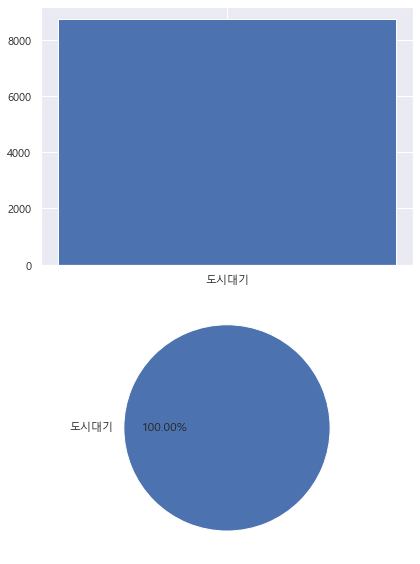

In [31]:
temp = air_21[feature].value_counts()
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

### ''

In [108]:
feature = '측정소코드'
print(air_21[feature].isnull().sum())

0


In [33]:
air_21[feature].describe()

count      8760.0
mean     111123.0
std           0.0
min      111123.0
25%      111123.0
50%      111123.0
75%      111123.0
max      111123.0
Name: 측정소코드, dtype: float64

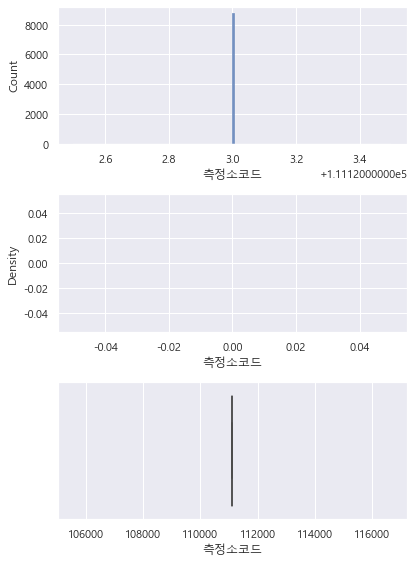

In [110]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

In [103]:
air_21.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8750, 8751, 8752, 8753, 8754, 8755, 8756, 8757, 8758, 8759],
           dtype='int64', length=8760)

<function matplotlib.pyplot.show(close=None, block=None)>

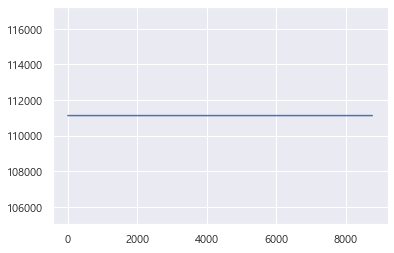

In [109]:
plt.plot(air_21.index, air_21[feature])
plt.show

### ''

In [35]:
feature = '측정소명'
print(air_21[feature].isnull().sum())

0


In [36]:
air_21[feature].describe()

count     8760
unique       1
top        종로구
freq      8760
Name: 측정소명, dtype: object

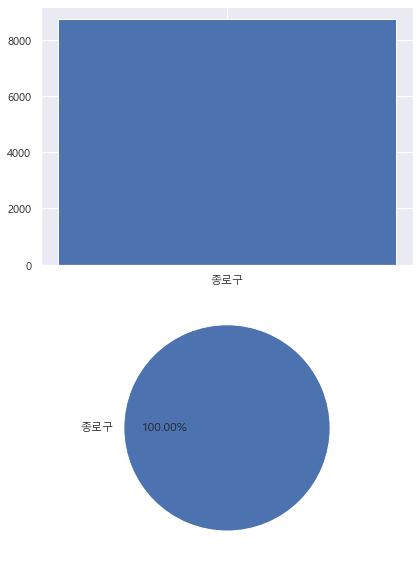

In [38]:
temp = air_21[feature].value_counts()
plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

### ''

In [111]:
feature = '측정일시'
print(air_21[feature].isnull().sum())

0


In [112]:
air_21[feature].describe()

count    8.760000e+03
mean     2.021067e+09
std      3.450216e+04
min      2.021010e+09
25%      2.021040e+09
50%      2.021070e+09
75%      2.021100e+09
max      2.021123e+09
Name: 측정일시, dtype: float64

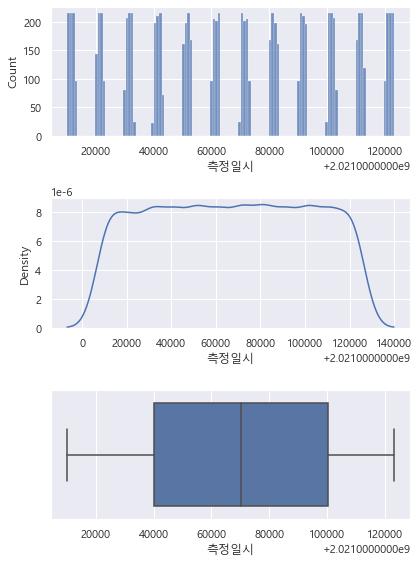

In [113]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

In [43]:
air_21[feature]

0       2021100101
1       2021100102
2       2021100103
3       2021100104
4       2021100105
           ...    
8755    2021093020
8756    2021093021
8757    2021093022
8758    2021093023
8759    2021093024
Name: 측정일시, Length: 8760, dtype: int64

### 'SO2'

In [114]:
feature = 'SO2'
print(air_21[feature].isnull().sum())

112


In [45]:
air_21[feature].describe()

count    8648.000000
mean        0.003385
std         0.000826
min         0.001000
25%         0.003000
50%         0.003000
75%         0.004000
max         0.011000
Name: SO2, dtype: float64

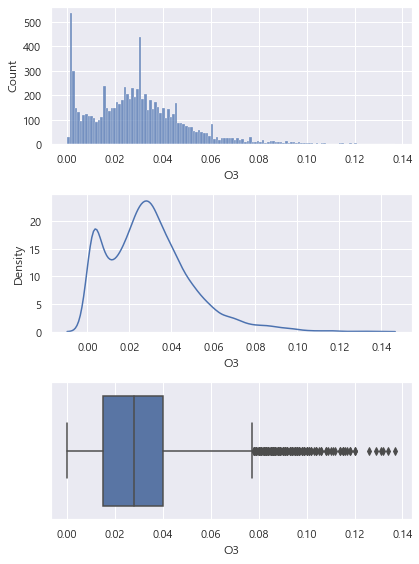

In [61]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

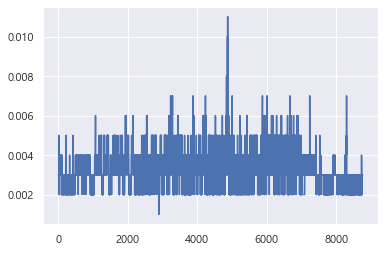

In [115]:
plt.plot(air_21.index, air_21[feature])
plt.show

### 'CO'

In [116]:
feature = 'CO'
print(air_21[feature].isnull().sum())

80


In [49]:
air_21[feature].describe()

count    8680.000000
mean        0.505645
std         0.209516
min         0.200000
25%         0.400000
50%         0.400000
75%         0.600000
max         2.000000
Name: CO, dtype: float64

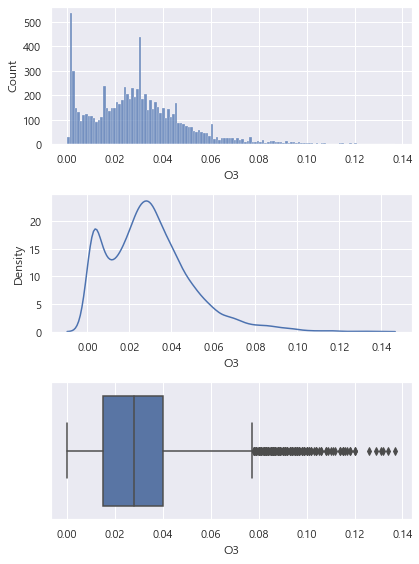

In [62]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

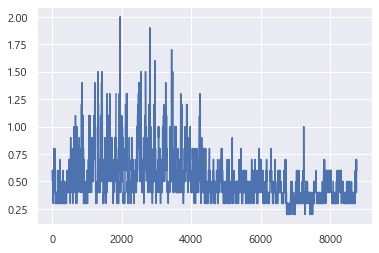

In [117]:
plt.plot(air_21.index, air_21[feature])
plt.show

### 'O3'

In [118]:
feature = 'O3'
print(air_21[feature].isnull().sum())

97


In [54]:
air_21[feature].describe()

count    8663.000000
mean        0.029246
std         0.019708
min         0.000000
25%         0.015000
50%         0.028000
75%         0.040000
max         0.137000
Name: O3, dtype: float64

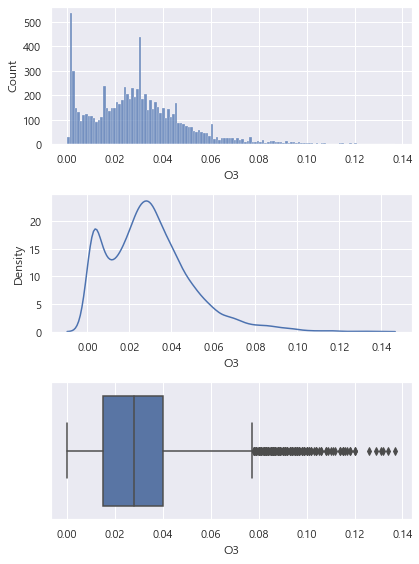

In [64]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

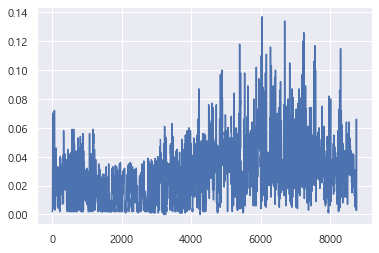

In [119]:
plt.plot(air_21.index, air_21[feature])
plt.show

### 'NO2'

In [120]:
feature = 'NO2'
print(air_21[feature].isnull().sum())

80


In [66]:
air_21[feature].describe()

count    8680.000000
mean        0.023346
std         0.014456
min         0.003000
25%         0.012000
50%         0.019000
75%         0.031000
max         0.082000
Name: NO2, dtype: float64

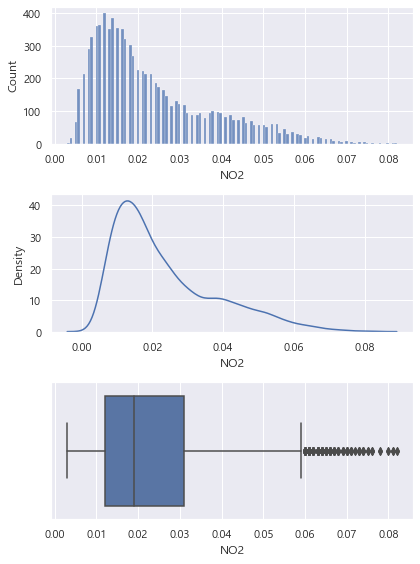

In [68]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

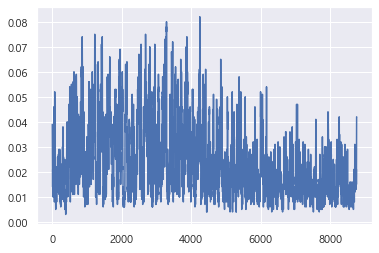

In [121]:
plt.plot(air_21.index, air_21[feature])
plt.show

### 'PM10' Target

In [122]:
feature = 'PM10'
print(air_21[feature].isnull().sum())

105


In [73]:
air_21[feature].describe()

count    8655.000000
mean       38.925361
std        47.470577
min         3.000000
25%        18.000000
50%        30.000000
75%        46.000000
max       942.000000
Name: PM10, dtype: float64

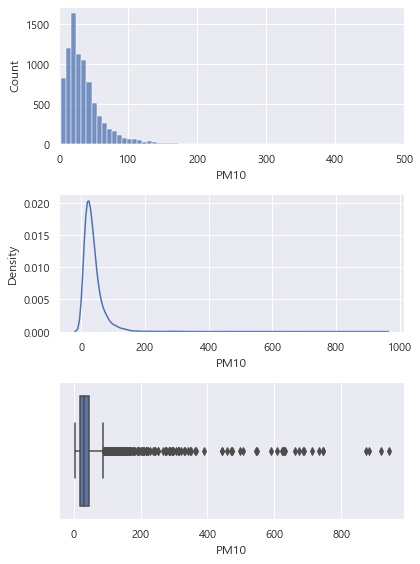

In [74]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.xlim(0, 500)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

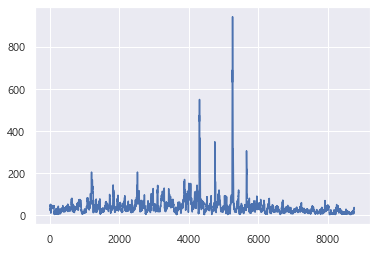

In [123]:
plt.plot(air_21.index, air_21[feature])
plt.show

### 'PM25'

In [124]:
feature = 'PM25'
print(air_21[feature].isnull().sum())

97


In [77]:
air_21[feature].describe()

count    8663.000000
mean       20.466005
std        16.564915
min         1.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       154.000000
Name: PM25, dtype: float64

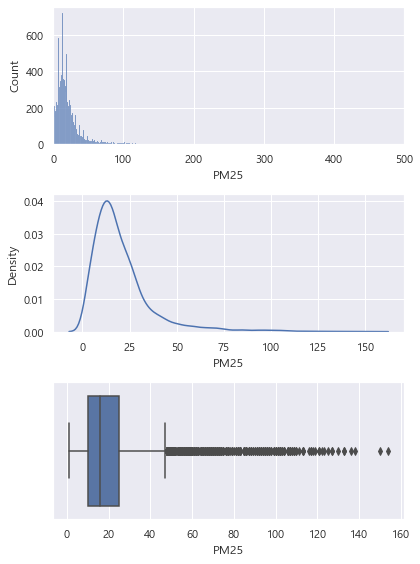

In [78]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
plt.xlim(0, 500)
sns.histplot(air_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(air_21[feature])

plt.subplot(3,1,3)
sns.boxplot(air_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

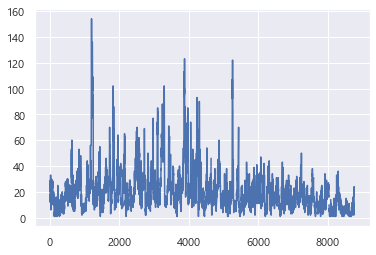

In [125]:
plt.plot(air_21.index, air_21[feature])
plt.show

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
'지역', '주소' 다 같은값 삭제 필요
'망'            동일한 값 삭제 필요
'측정소코드' 동일한 값 삭제 필요
'측정소명'    동일한 값 삭제 필요
'측정일시'    

# 2.
# 3.

#### [실습문제5] 날씨 데이터 알아보기
* weather_21, weather_22 의 다양한 변수에 대하여 여러 그래프를 그려보고 인사이트를 도출해보세요.

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [81]:
weather_21.columns

Index(['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',
       '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)',
       '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)',
       '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )',
       '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

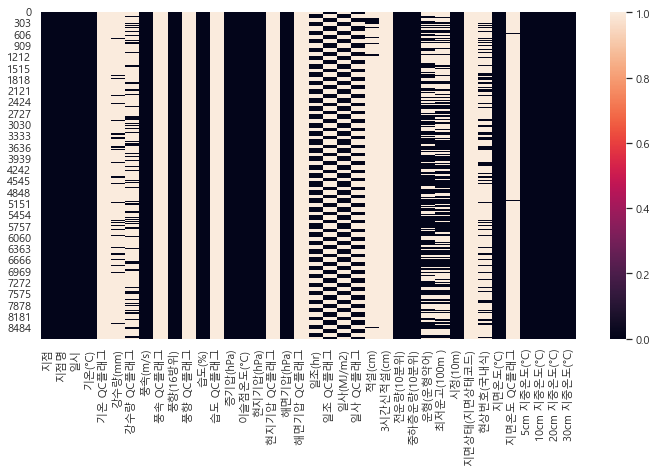

In [84]:
plt.figure(figsize = (12,6))
sns.heatmap(weather_21.isna())
plt.show()

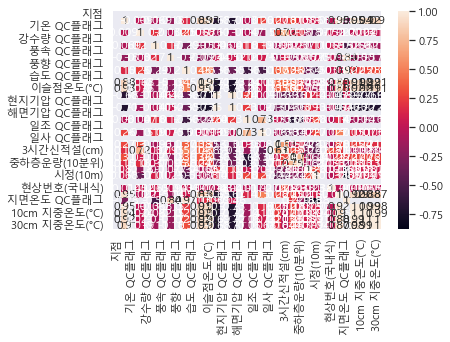

<Figure size 7200x7200 with 0 Axes>

In [93]:
sns.heatmap(weather_21.corr(), annot = True)
plt.figure(figsize=(100, 100))
plt.show()

### '지점'

In [128]:
feature = '지점'
print(weather_21[feature].isnull().sum())

0


In [129]:
weather_21[feature].describe()

count    8759.0
mean      108.0
std         0.0
min       108.0
25%       108.0
50%       108.0
75%       108.0
max       108.0
Name: 지점, dtype: float64

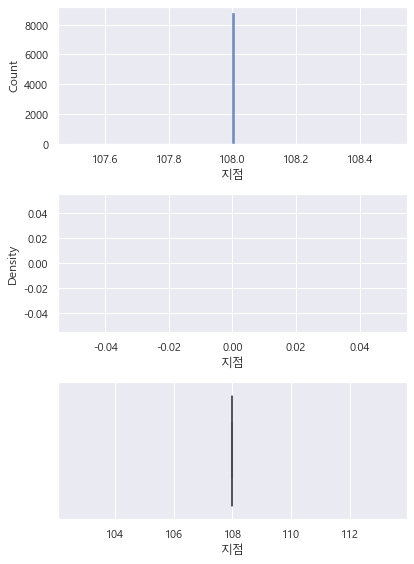

In [130]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

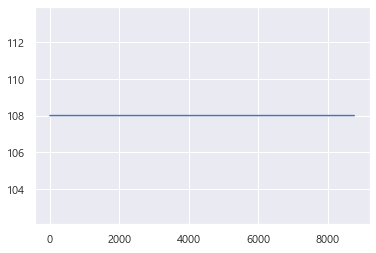

In [133]:
plt.plot(weather_21.index, weather_21[feature])
plt.show

### ''

In [134]:
feature = '지점명'
print(weather_21[feature].isnull().sum())

0


In [135]:
weather_21[feature].describe()

count     8759
unique       1
top         서울
freq      8759
Name: 지점명, dtype: object

### '일시'

In [138]:
feature = '일시'
print(weather_21[feature].isnull().sum())

0


In [139]:
weather_21[feature].describe()

count                 8759
unique                8759
top       2021-01-01 01:00
freq                     1
Name: 일시, dtype: object

In [140]:
weather_21[feature]

0       2021-01-01 01:00
1       2021-01-01 02:00
2       2021-01-01 03:00
3       2021-01-01 04:00
4       2021-01-01 05:00
              ...       
8754    2021-12-31 19:00
8755    2021-12-31 20:00
8756    2021-12-31 21:00
8757    2021-12-31 22:00
8758    2021-12-31 23:00
Name: 일시, Length: 8759, dtype: object

In [ ]:
plt.plot(weather_21, weather_21[feature])
plt.show

### '기온(°C)'

In [5]:
feature = '기온(°C)'
print(weather_21[feature].isnull().sum())

0


In [6]:
weather_21[feature].describe()

count    8759.000000
mean       13.739194
std        10.894786
min       -18.500000
25%         6.000000
50%        14.600000
75%        22.600000
max        36.300000
Name: 기온(°C), dtype: float64

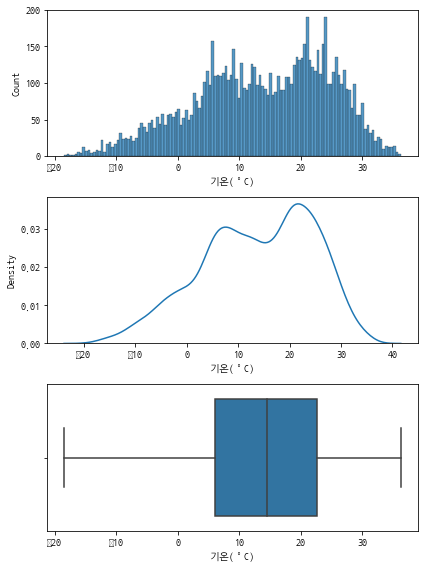

In [7]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

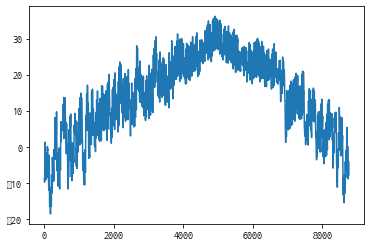

In [9]:
plt.plot(weather_21.index, weather_21[feature])
plt.show

### ''

In [18]:
weather_21[feature].count

<bound method Series.count of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
8754   NaN
8755   NaN
8756   NaN
8757   NaN
8758   NaN
Name: 기온 QC플래그, Length: 8759, dtype: float64>

In [10]:
feature = '기온 QC플래그'
print(weather_21[feature].isnull().sum())

8759


In [11]:
weather_21[feature].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 기온 QC플래그, dtype: float64

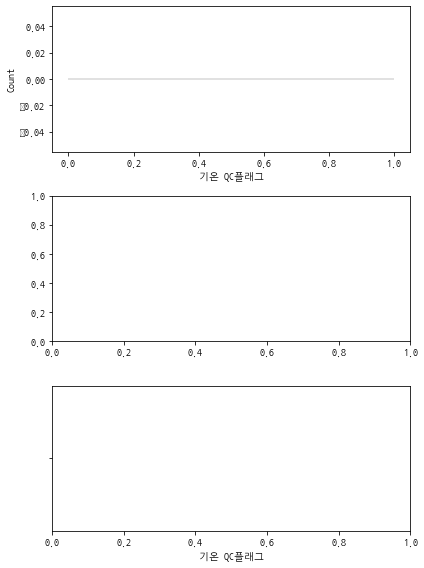

In [12]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

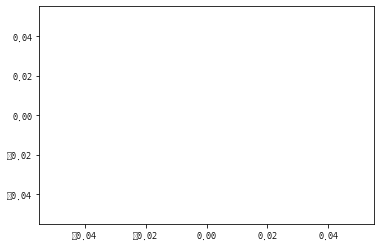

In [17]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '강수량(mm)'

In [52]:
feature = '강수량(mm)'
print(weather_21[feature].isnull().sum())

7810


In [20]:
weather_21[feature].describe()

count    949.000000
mean       1.250263
std        3.398801
min        0.000000
25%        0.000000
50%        0.100000
75%        1.100000
max       64.700000
Name: 강수량(mm), dtype: float64

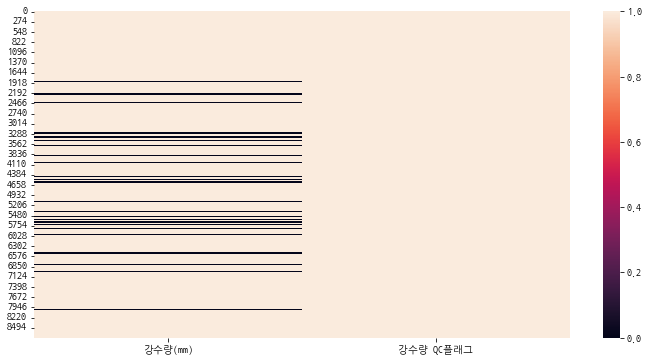

In [64]:
plt.figure(figsize = (12,6))
sns.heatmap(pd.DataFrame(weather_21['강수량 QC플래그'], weather_21[feature]).reset_index().isna())
plt.show()

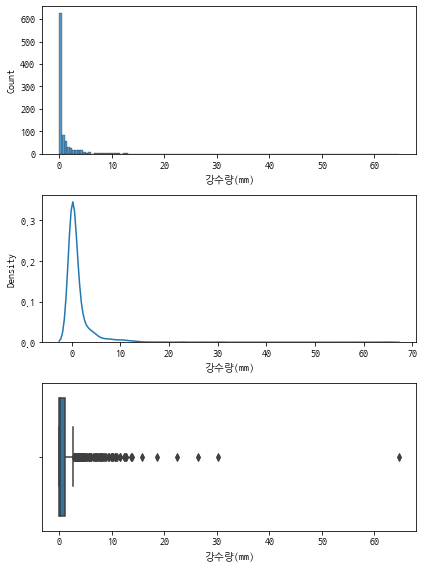

In [21]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

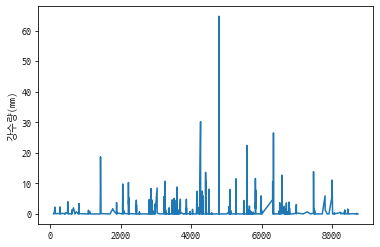

In [22]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

In [29]:
weather_21[feature].value_counts()

0.0     436
0.1      55
0.2      47
0.3      45
0.7      23
       ... 
7.4       1
30.2      1
7.5       1
13.6      1
11.1      1
Name: 강수량(mm), Length: 97, dtype: int64

### ''

In [30]:
feature = '강수량 QC플래그'
print(weather_21[feature].isnull().sum())

6996


In [31]:
weather_21[feature].describe()

count    1763.0
mean        9.0
std         0.0
min         9.0
25%         9.0
50%         9.0
75%         9.0
max         9.0
Name: 강수량 QC플래그, dtype: float64

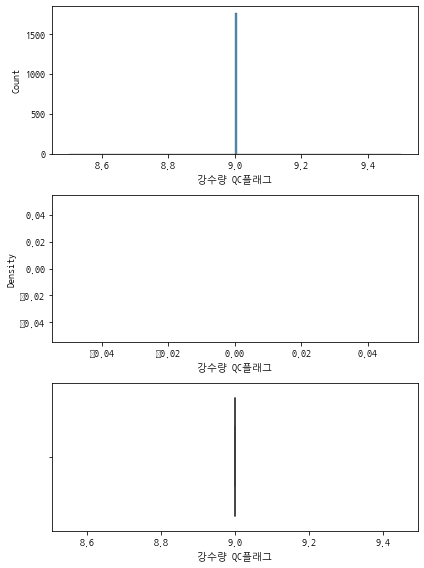

In [32]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

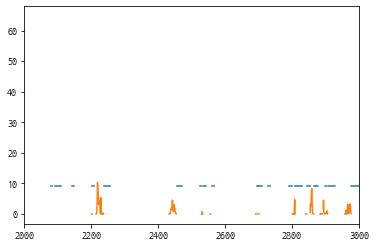

In [45]:
plt.plot(weather_21.index, weather_21[feature])
plt.plot(weather_21.index, weather_21['강수량(mm)'])
plt.xlim(2000, 3000)
plt.show

### '풍속(m/s)'

In [46]:
feature = '풍속(m/s)'
print(weather_21[feature].isnull().sum())

2


In [47]:
weather_21[feature].describe()

count    8757.000000
mean        2.311328
std         1.120906
min         0.000000
25%         1.500000
50%         2.200000
75%         2.900000
max         8.300000
Name: 풍속(m/s), dtype: float64

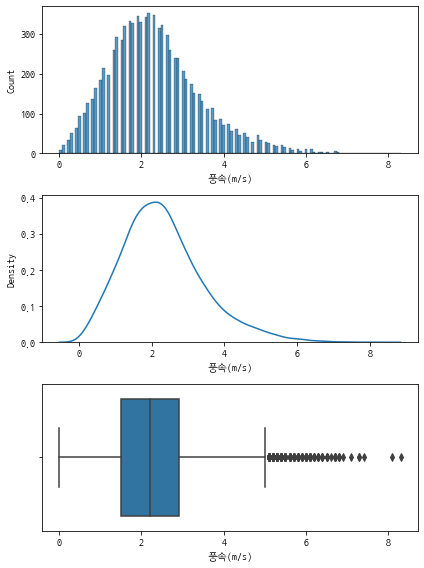

In [48]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

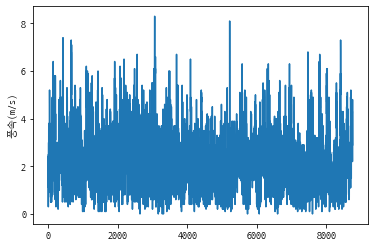

In [49]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [68]:
feature = '풍속 QC플래그'
print(weather_21[feature].isnull().sum())

8757


In [69]:
weather_21[feature].describe()

count    2.0
mean     9.0
std      0.0
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: 풍속 QC플래그, dtype: float64

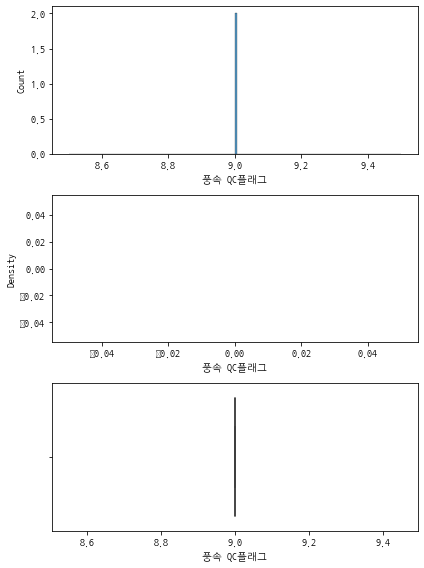

In [70]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

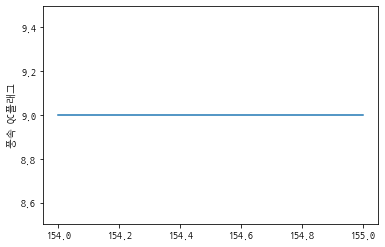

In [71]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [73]:
feature = '풍향(16방위)'
print(weather_21[feature].isnull().sum())

2


In [74]:
weather_21[feature].describe()

count    8757.000000
mean      169.658559
std       107.549684
min         0.000000
25%        50.000000
50%       200.000000
75%       270.000000
max       360.000000
Name: 풍향(16방위), dtype: float64

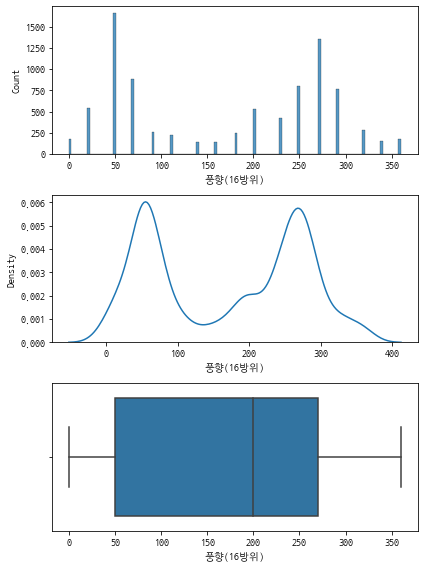

In [75]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

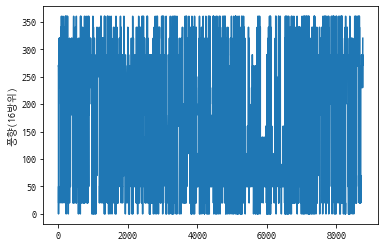

In [77]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '풍향 QC플래그'

In [79]:
feature = '풍향 QC플래그'
print(weather_21[feature].isnull().sum())

8757


In [80]:
weather_21[feature].describe()

count    2.0
mean     9.0
std      0.0
min      9.0
25%      9.0
50%      9.0
75%      9.0
max      9.0
Name: 풍향 QC플래그, dtype: float64

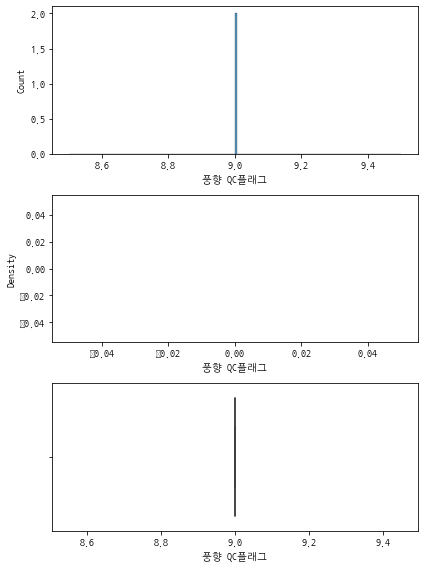

In [81]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

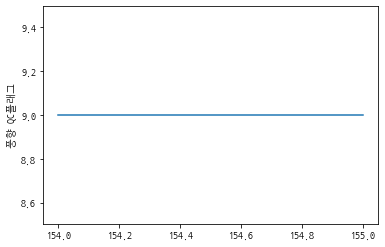

In [82]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [83]:
feature = '습도(%)'
print(weather_21[feature].isnull().sum())

0


In [84]:
weather_21[feature].describe()

count    8759.000000
mean       65.589223
std        18.394276
min        19.000000
25%        51.000000
50%        66.000000
75%        80.000000
max       100.000000
Name: 습도(%), dtype: float64

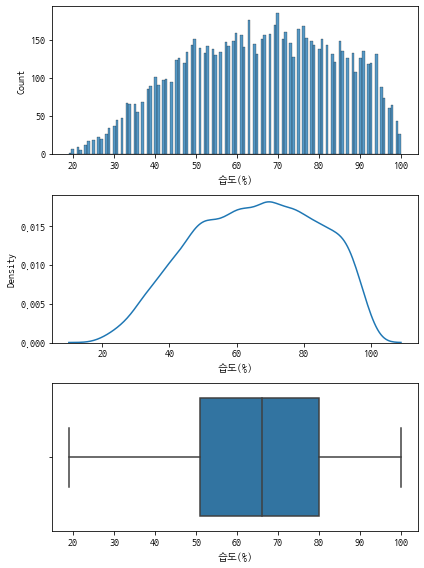

In [85]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

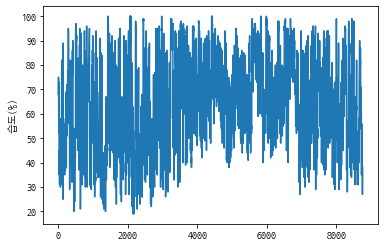

In [86]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '습도 QC플래그'

In [87]:
feature = '습도 QC플래그'
print(weather_21[feature].isnull().sum())

8759


In [88]:
weather_21[feature].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 습도 QC플래그, dtype: float64

### '증기압(hPa)'

In [89]:
feature = '증기압(hPa)'
print(weather_21[feature].isnull().sum())

0


In [90]:
weather_21[feature].describe()

count    8759.000000
mean       12.631236
std         8.282075
min         0.700000
25%         5.900000
50%         9.700000
75%        19.900000
max        32.200000
Name: 증기압(hPa), dtype: float64

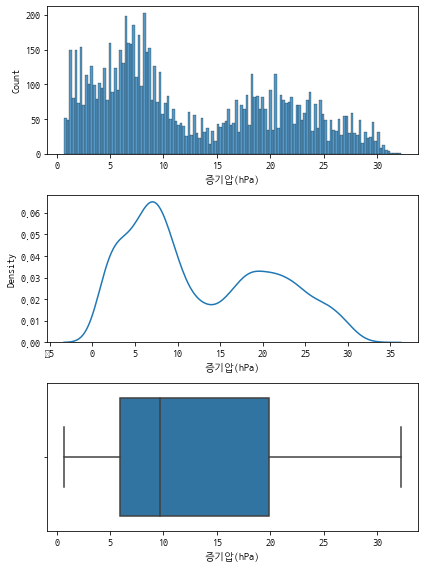

In [91]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

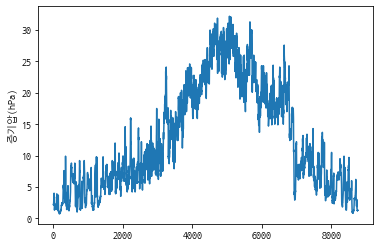

In [92]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '이슬점온도(°C)'

In [95]:
feature = '이슬점온도(°C)'
print(weather_21[feature].isnull().sum())

0


In [96]:
weather_21[feature].describe()

count    8759.000000
mean        6.842094
std        11.736897
min       -27.000000
25%        -0.400000
50%         6.600000
75%        17.400000
max        25.300000
Name: 이슬점온도(°C), dtype: float64

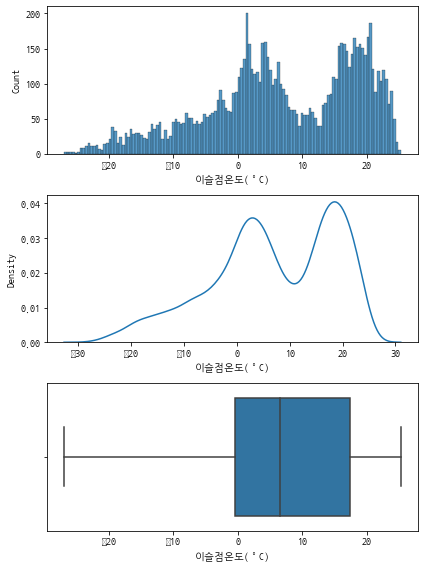

In [97]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

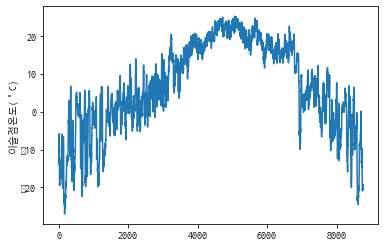

In [99]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '현지기압(hPa)'

In [100]:
feature = '현지기압(hPa)'
print(weather_21[feature].isnull().sum())

0


In [101]:
weather_21[feature].describe()

count    8759.000000
mean     1006.046603
std         7.928167
min       986.900000
25%       999.800000
50%      1006.300000
75%      1012.000000
max      1025.800000
Name: 현지기압(hPa), dtype: float64

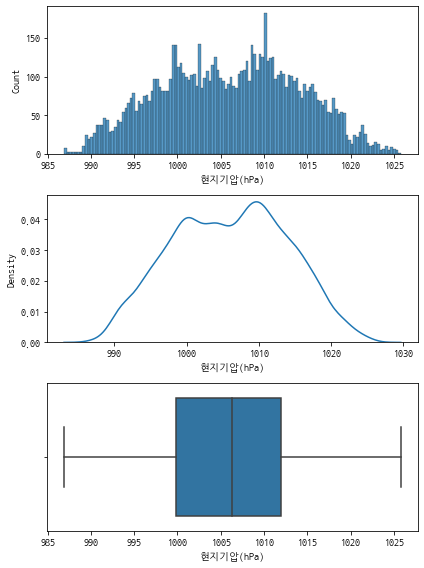

In [102]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

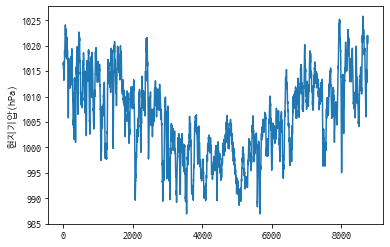

In [103]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '현지기압 QC플래그'

In [104]:
feature = '현지기압 QC플래그'
print(weather_21[feature].isnull().sum())

8759


In [105]:
weather_21[feature].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 현지기압 QC플래그, dtype: float64

### '해면기압(hPa)'

In [106]:
feature = '해면기압(hPa)'
print(weather_21[feature].isnull().sum())

0


In [107]:
weather_21[feature].describe()

count    8759.000000
mean     1016.280317
std         8.311602
min       996.500000
25%      1009.700000
50%      1016.400000
75%      1022.500000
max      1037.400000
Name: 해면기압(hPa), dtype: float64

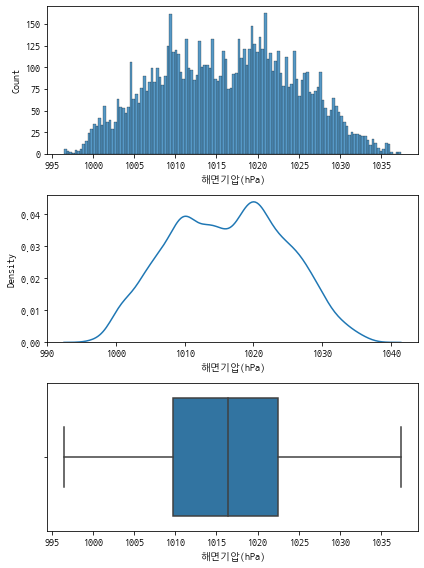

In [108]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

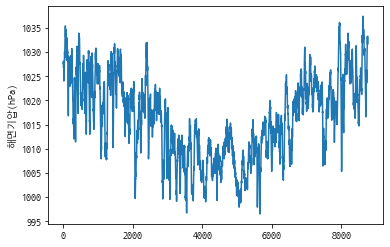

In [109]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '일조(hr)'

In [140]:
feature = '일조(hr)'
print(weather_21[feature].isnull().sum())

3968


In [141]:
weather_21[feature].describe()

count    4791.000000
mean        0.458380
std         0.438788
min         0.000000
25%         0.000000
50%         0.400000
75%         1.000000
max         1.000000
Name: 일조(hr), dtype: float64

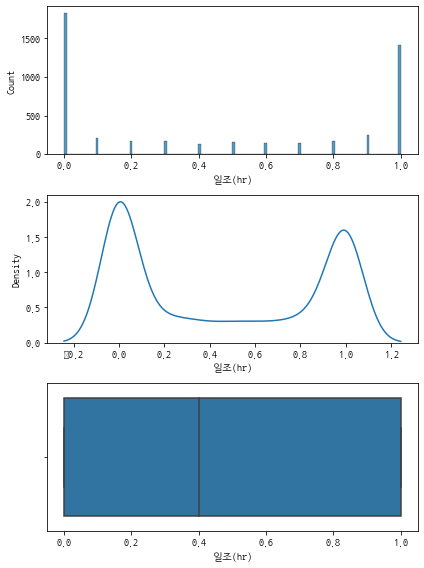

In [112]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

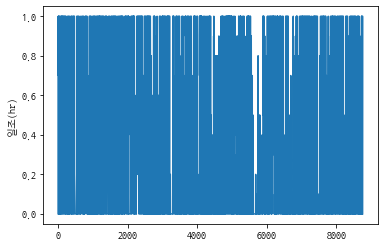

In [113]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [114]:
feature = '일조 QC플래그'
print(weather_21[feature].isnull().sum())

4791


In [115]:
weather_21[feature].describe()

count    3968.0
mean        9.0
std         0.0
min         9.0
25%         9.0
50%         9.0
75%         9.0
max         9.0
Name: 일조 QC플래그, dtype: float64

In [ ]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

In [ ]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '일사(MJ/m2)'

In [117]:
feature = '일사(MJ/m2)'
print(weather_21[feature].isnull().sum())

3968


In [118]:
weather_21[feature].describe()

count    4791.000000
mean        1.076706
std         0.966440
min         0.000000
25%         0.230000
50%         0.790000
75%         1.800000
max         3.740000
Name: 일사(MJ/m2), dtype: float64

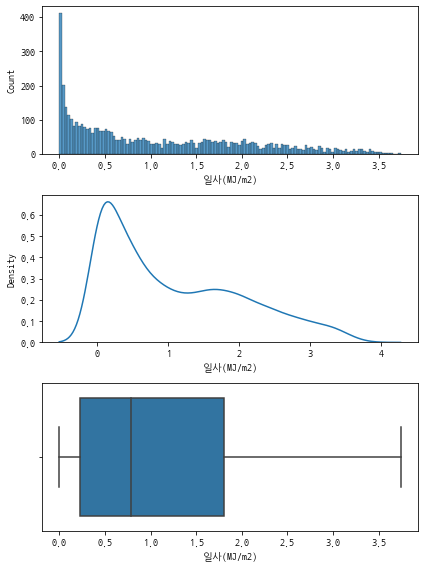

In [119]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

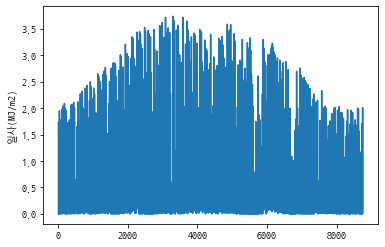

In [120]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '일사 QC플래그'

In [123]:
feature = '일사 QC플래그'
print(weather_21[feature].isnull().sum())

4791


In [124]:
weather_21[feature].describe()

count    3968.0
mean        9.0
std         0.0
min         9.0
25%         9.0
50%         9.0
75%         9.0
max         9.0
Name: 일사 QC플래그, dtype: float64

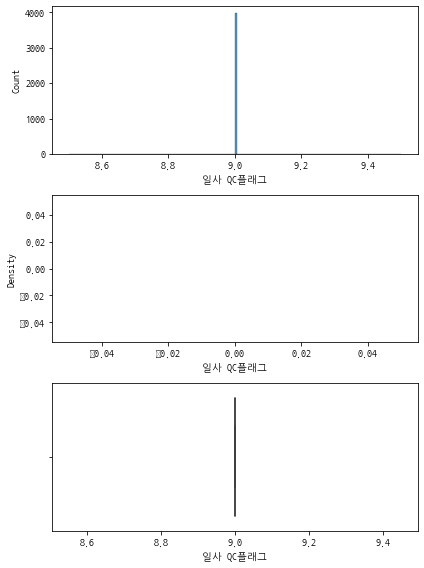

In [125]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

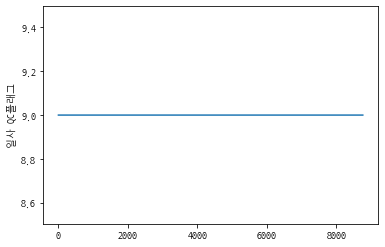

In [126]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [128]:
feature = '적설(cm)'
print(weather_21[feature].isnull().sum())

8380


In [129]:
weather_21[feature].describe()

count    379.000000
mean       1.397625
std        1.357390
min        0.000000
25%        0.400000
50%        0.900000
75%        1.850000
max        5.100000
Name: 적설(cm), dtype: float64

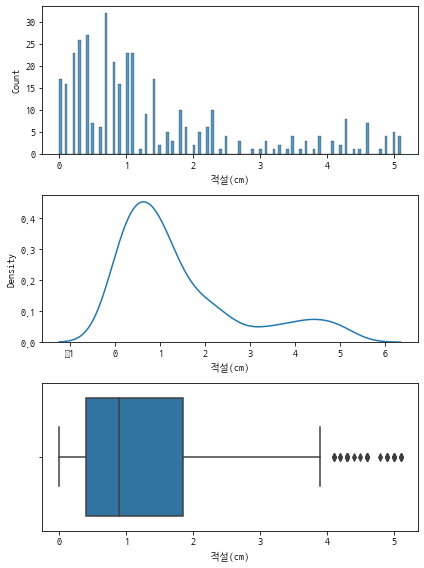

In [130]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

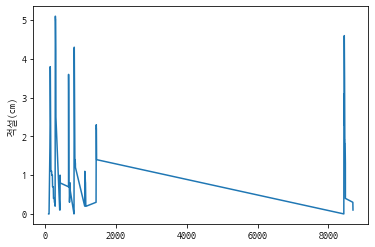

In [131]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '3시간신적설(cm)'

In [133]:
feature = '3시간신적설(cm)'
print(weather_21[feature].isnull().sum())

8730


In [134]:
weather_21[feature].describe()

count    29.000000
mean      0.962069
std       1.424132
min       0.000000
25%       0.000000
50%       0.200000
75%       0.900000
max       4.400000
Name: 3시간신적설(cm), dtype: float64

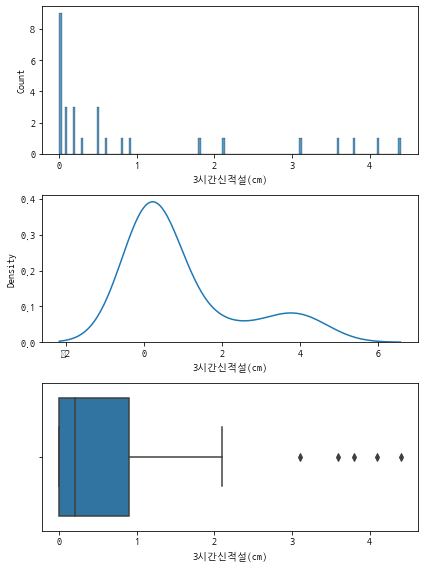

In [135]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

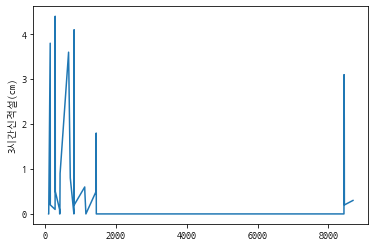

In [136]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '전운량(10분위)'

In [143]:
feature = '전운량(10분위)'
print(weather_21[feature].isnull().sum())

2


In [144]:
weather_21[feature].describe()

count    8757.000000
mean        4.960489
std         3.929256
min         0.000000
25%         0.000000
50%         6.000000
75%         9.000000
max        10.000000
Name: 전운량(10분위), dtype: float64

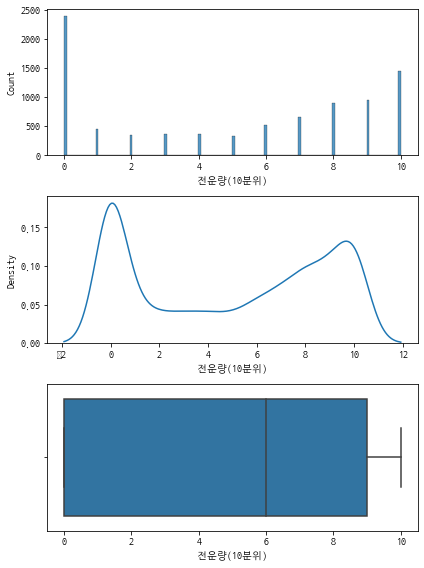

In [145]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

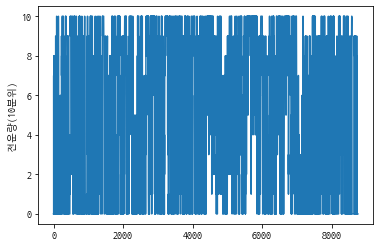

In [146]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '중하층운량(10분위)'

In [147]:
feature = '중하층운량(10분위)'
print(weather_21[feature].isnull().sum())

0


In [148]:
weather_21[feature].describe()

count    8759.000000
mean        3.033565
std         3.452846
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max        10.000000
Name: 중하층운량(10분위), dtype: float64

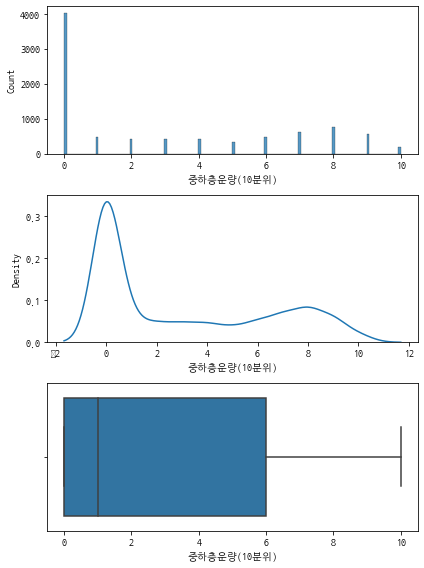

In [149]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

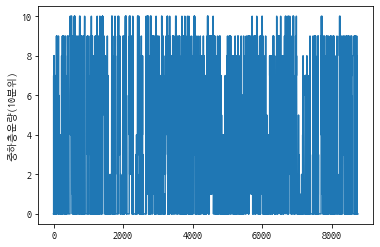

In [150]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [151]:
feature = '운형(운형약어)'
print(weather_21[feature].isnull().sum())

3812


In [152]:
weather_21[feature].describe()

count     4947
unique      46
top         Sc
freq      1409
Name: 운형(운형약어), dtype: object

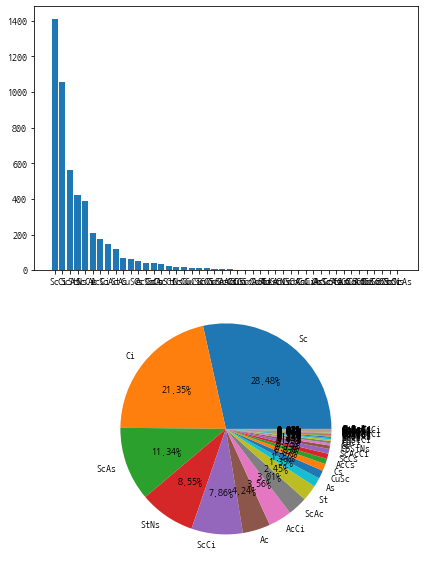

In [157]:
temp = weather_21[feature].value_counts()

plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

### ''

In [165]:
feature = '최저운고(100m )'
print(weather_21[feature].isnull().sum())

4212


In [166]:
weather_21[feature].describe()

count    4547.000000
mean       15.161425
std        13.537921
min         1.000000
25%         7.000000
50%        10.000000
75%        16.000000
max        76.000000
Name: 최저운고(100m ), dtype: float64

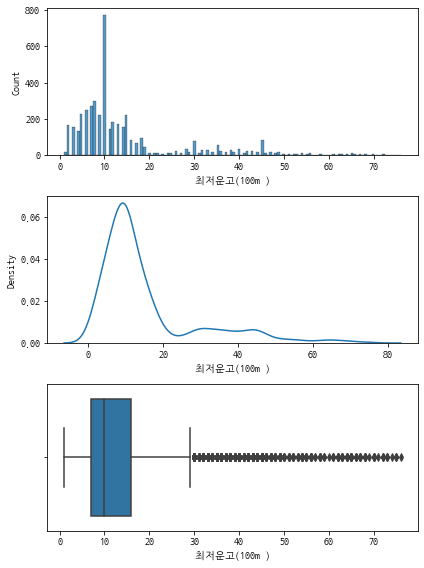

In [167]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

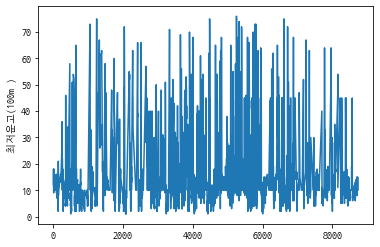

In [168]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '시정(10m)'

In [170]:
feature = '시정(10m)'
print(weather_21[feature].isnull().sum())

0


In [171]:
weather_21[feature].describe()

count    8759.000000
mean     1719.765384
std       521.130959
min        33.000000
25%      1719.000000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: 시정(10m), dtype: float64

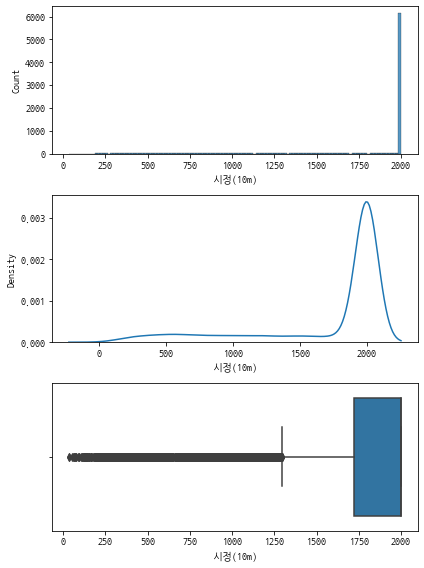

In [172]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

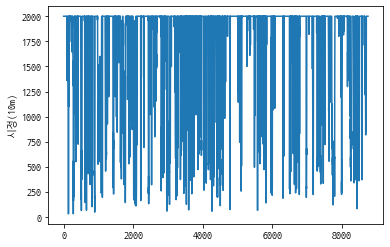

In [173]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '지면상태(지면상태코드)'

In [174]:
feature = '지면상태(지면상태코드)'
print(weather_21[feature].isnull().sum())

8759


In [175]:
weather_21[feature].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: 지면상태(지면상태코드), dtype: float64

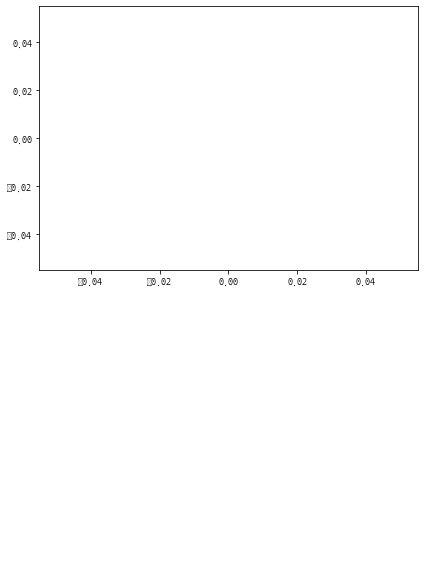

In [176]:
temp = weather_21[feature].value_counts()

plt.figure(figsize = (6, 8))
plt.subplot(2,1,1)
plt.bar(temp.index, temp.values)

plt.subplot(2,1,2)
plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()

### '현상번호(국내식)'

In [181]:
feature = '현상번호(국내식)'
print(weather_21[feature].isnull().sum())

6634


In [182]:
weather_21[feature].describe()

count    2.125000e+03
mean     1.367177e+04
std      4.170156e+05
min      1.000000e+00
25%      5.000000e+00
50%      1.900000e+01
75%      1.901000e+03
max      1.916020e+07
Name: 현상번호(국내식), dtype: float64

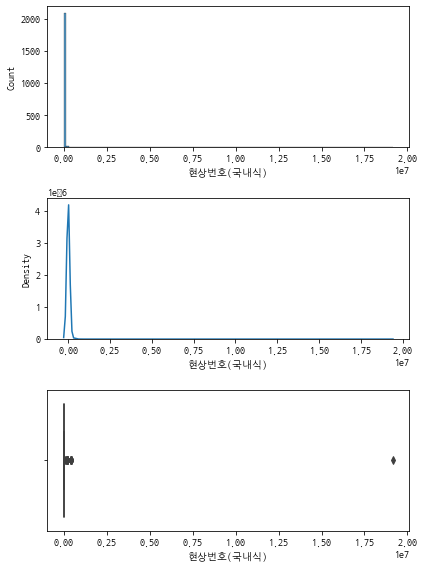

In [183]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

In [184]:
weather_21[feature].value_counts()

19.0          602
1.0           446
1901.0        438
40.0          178
42.0          156
5.0            78
4.0            49
1902.0         28
4019.0         28
4219.0         24
1905.0         22
1904.0         11
190201.0        9
4001.0          6
401901.0        5
421901.0        5
1916.0          4
191601.0        4
401.0           3
4201.0          3
190401.0        3
1910.0          2
1105.0          2
190605.0        2
11.0            2
16.0            2
190402.0        1
1005.0          1
10.0            1
100601.0        1
6.0             1
1906.0          1
421902.0        1
4204.0          1
190601.0        1
201.0           1
2.0             1
191602.0        1
19160201.0      1
Name: 현상번호(국내식), dtype: int64

### ''

In [178]:
feature = '지면온도(°C)'
print(weather_21[feature].isnull().sum())

6634


In [179]:
weather_21[feature].describe()

count    2.125000e+03
mean     1.367177e+04
std      4.170156e+05
min      1.000000e+00
25%      5.000000e+00
50%      1.900000e+01
75%      1.901000e+03
max      1.916020e+07
Name: 현상번호(국내식), dtype: float64

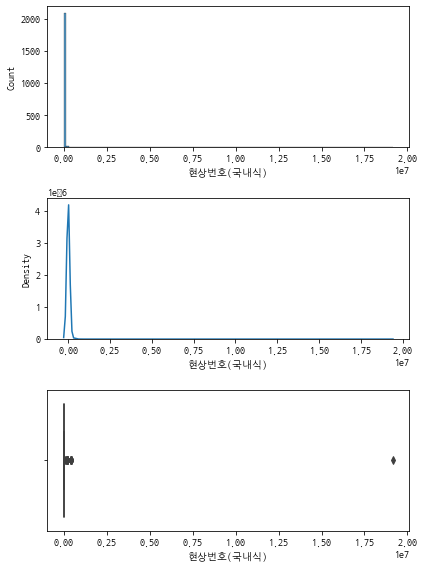

In [180]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

In [ ]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '지면온도(°C)'

In [186]:
feature = '지면온도(°C)'
print(weather_21[feature].isnull().sum())

5


In [187]:
weather_21[feature].describe()

count    8754.000000
mean       14.734304
std        12.042066
min       -12.700000
25%         4.300000
50%        15.400000
75%        23.600000
max        56.800000
Name: 지면온도(°C), dtype: float64

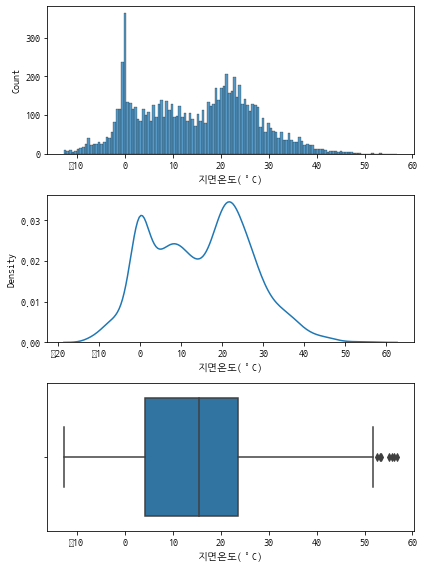

In [188]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

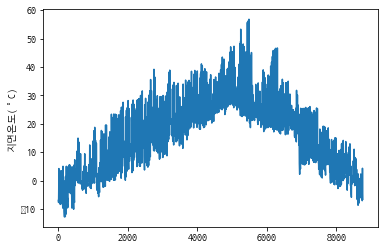

In [189]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### ''

In [190]:
feature = '5cm 지중온도(°C)'
print(weather_21[feature].isnull().sum())

5


In [191]:
weather_21[feature].describe()

count    8754.000000
mean       15.128581
std        10.175582
min        -4.700000
25%         5.900000
50%        15.400000
75%        24.100000
max        35.700000
Name: 5cm 지중온도(°C), dtype: float64

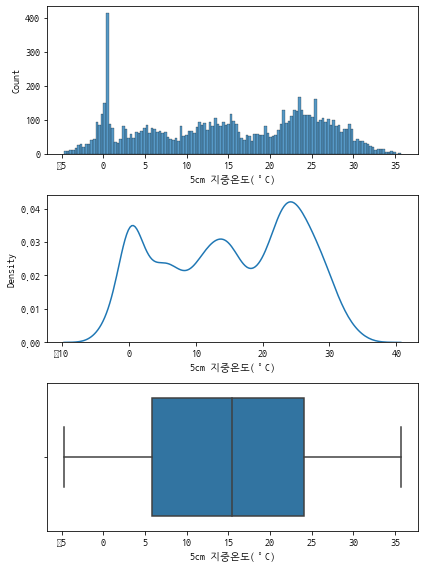

In [192]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

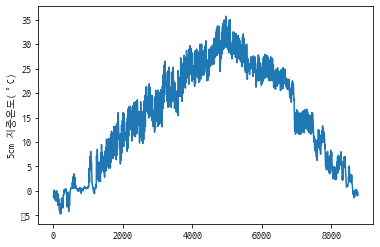

In [193]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '10cm 지중온도(°C)'

In [195]:
feature = '10cm 지중온도(°C)'
print(weather_21[feature].isnull().sum())

5


In [196]:
weather_21[feature].describe()

count    8754.000000
mean       14.555118
std        10.044423
min        -4.600000
25%         5.500000
50%        14.700000
75%        23.500000
max        33.700000
Name: 10cm 지중온도(°C), dtype: float64

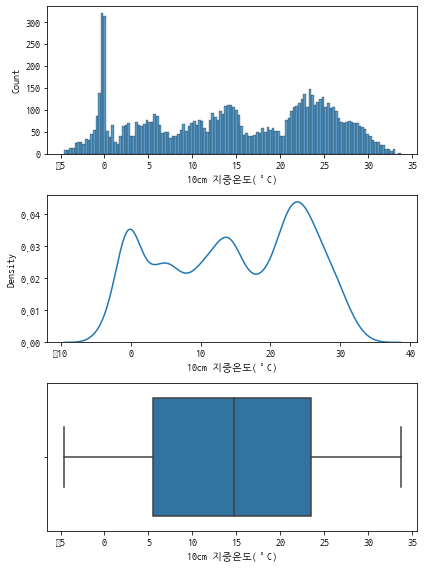

In [197]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

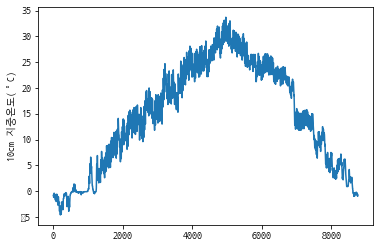

In [198]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '20cm 지중온도(°C)'

In [200]:
feature = '20cm 지중온도(°C)'
print(weather_21[feature].isnull().sum())

5


In [201]:
weather_21[feature].describe()

count    8754.000000
mean       14.533276
std         9.739277
min        -3.000000
25%         5.600000
50%        14.600000
75%        23.400000
max        31.900000
Name: 20cm 지중온도(°C), dtype: float64

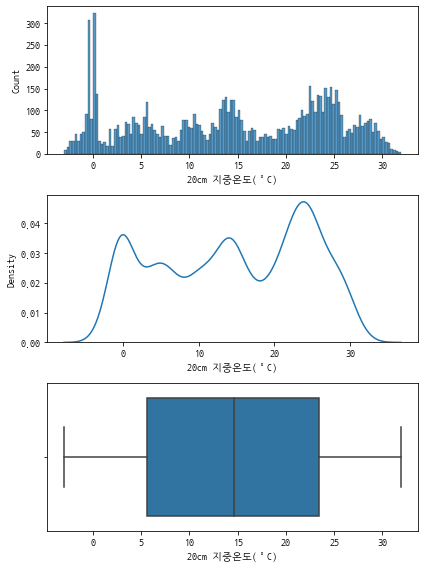

In [202]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

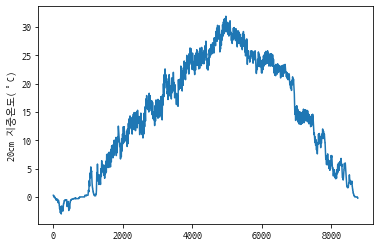

In [203]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

### '30cm 지중온도(°C)'

In [204]:
feature = '30cm 지중온도(°C)'
print(weather_21[feature].isnull().sum())

5


In [205]:
weather_21[feature].describe()

count    8754.000000
mean       14.827633
std         9.360493
min        -0.800000
25%         6.300000
50%        15.100000
75%        23.600000
max        30.600000
Name: 30cm 지중온도(°C), dtype: float64

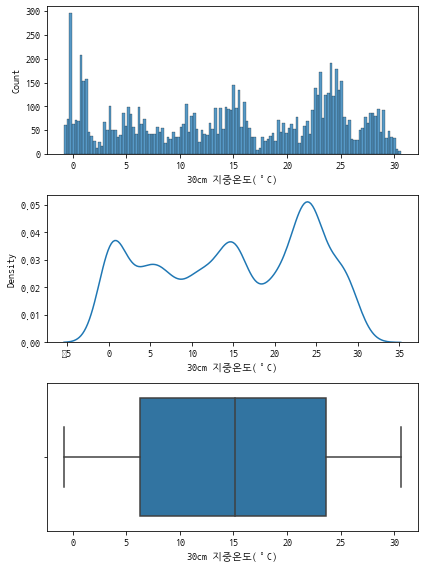

In [206]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(weather_21[feature], bins = 128)

plt.subplot(3,1,2)
sns.kdeplot(weather_21[feature])

plt.subplot(3,1,3)
sns.boxplot(weather_21[feature])

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

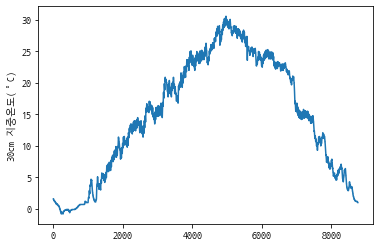

In [207]:
sns.lineplot(weather_21.index, weather_21[feature])
plt.show

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.(집중! 데이터 분포의 모양을 잘 살펴봐주세요.)
# 1. 
# 2.
# 3.